# Intro to NN classification with tf
Here let's see how to write classification problem.
A classification is where you try to  classify something as one thing or another.
A few types of classification problems:
* Binary classification
*Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
#Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Data is lil hard to understand rn, So let's visualize it

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


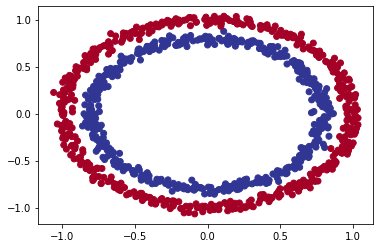

In [5]:
#  Visualize with plot
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shape

In [6]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
#How many samples
len(X),len(y)

(1000, 1000)

In [8]:
X[17],y[7]

(array([ 0.1070617, -0.7930922]), 1)

## Steps in modelling 
Steps in modelling with TF are:
1. Create a model
2. Complie the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate

In [9]:
from tensorflow.python import metrics
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

#1. Create model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
#3. fit
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [10]:
#Improving 
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Model_1 is guessing so not good

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model,2 layers this time
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )
#3. Fit model
model_2.fit(X,y,epochs=100,verbose=0)

In [12]:
#4. evaluate
model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving the model


In [13]:
#  # Random seed
# tf.random.set_seed(42)
# #1. model creating
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),## 100 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [14]:
#4. evaluate
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5100


[0.7006223797798157, 0.5099999904632568]

## To visualize our model prediction, creating a function `Plot decision boundary`.config(),It will take in 
* Take in trained model , features(X) and label (Y)
* Create a meshgrid of different X values
* Make predictions across meshgrid
* Plot prediction as well as line between zones (where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


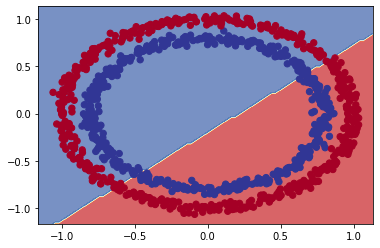

In [16]:
#Check out the prediction our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [17]:
#let see if our model can be used for regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=x+100
#Split regression data
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

#Fit our model to regression data
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=300)#This works only for scalar

In [18]:
#Setup random seed
tf.random.set_seed(42)
#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


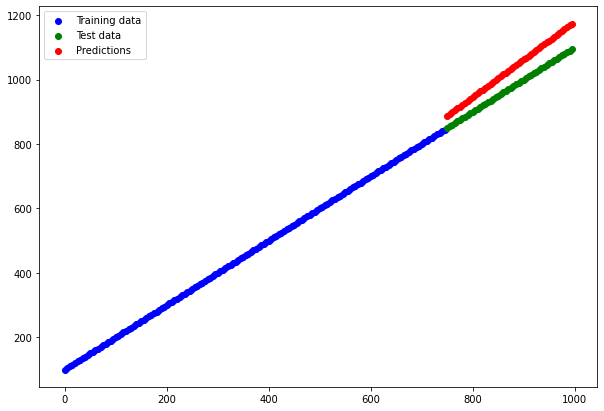

In [19]:
#Make prediction with trained model
y_reg_preds=model_3.predict(tf.expand_dims(X_reg_test,axis=-1))
#Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend()

## The missing piece:Non-linearity

In [20]:
#Random seed
tf.random.set_seed(42)
#1. Create model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
#2. Compile
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
#3. Fit the model
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

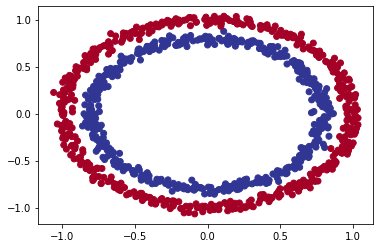

In [21]:
#Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


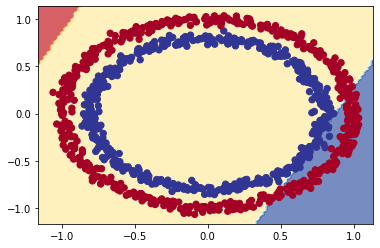

In [22]:
#Check decision boundary 
plot_decision_boundary(model=model_4,X=X,y=y)

In [23]:
## Building a NN with non linear
tf.random.set_seed(42)
#1. Create model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
    
])

#2. Complile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
#3. Fit the model
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

In [24]:
#Creating multi-layer NN
tf.random.set_seed(42)
#1. create model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history=model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


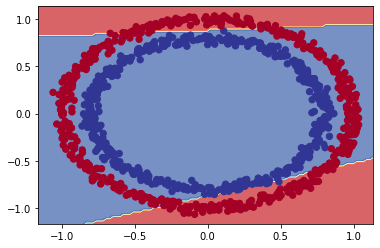

In [25]:
#Model predictions looks 
plot_decision_boundary(model=model_6,X=X,y=y)

In [26]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [27]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") #Sigmoid for binary classification?
    
])
#2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [28]:
#4. Evaluate
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


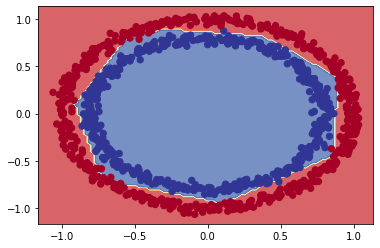

In [29]:
#Visualize
plot_decision_boundary(model_7,X,y)

## Note: The comb. of linear and lon-linear functions is 1 of the key funcamentals of Neural network

In [30]:
# Create a toy tensor which is similar to data we pass to our model
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

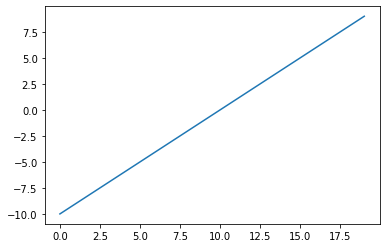

In [31]:
# Visualize toy tensor
plt.plot(A)

In [32]:
# Let's replicate sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use sigmoid on toy tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

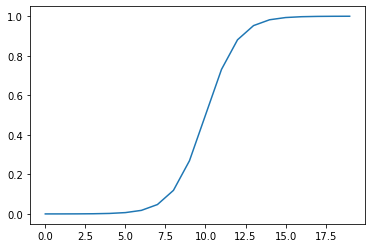

In [33]:
# Plot toy sigmoid tensor
plt.plot(sigmoid(A))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)


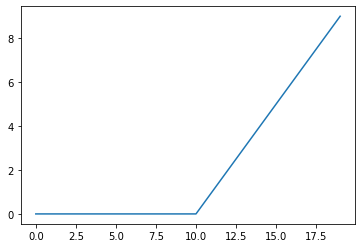

In [34]:
# Recreating Relu function
def relu(x):
  return tf.maximum(0,x)


print(relu(A))
plt.plot(relu(A))  

In [35]:
#Try linear activation function
tf.keras.activations.linear(A)#its same as original

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Evaluating and improving classification model



In [36]:
len(X)

1000

In [37]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [39]:
# Recreating the model 
#set random seed
tf.random.set_seed(42)
#1. create the model (same model_7)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history=model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/25
25/25 [

In [40]:
#4. Evaluate
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863724172115326, 0.9449999928474426]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


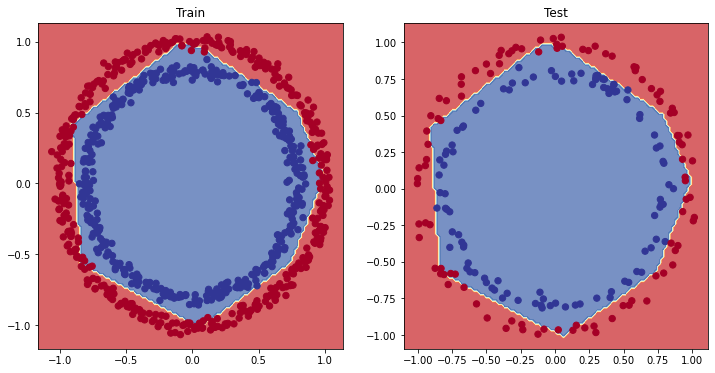

In [41]:
#Plot decision boundry for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)#1 row,2 column
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

## Plot the loss (or training) curves


In [42]:
history.history

{'loss': [0.6823503375053406,
  0.6749704480171204,
  0.6679719686508179,
  0.6634892821311951,
  0.6591553688049316,
  0.6474893689155579,
  0.631162166595459,
  0.6093025803565979,
  0.5843716263771057,
  0.544249951839447,
  0.4914669692516327,
  0.43143412470817566,
  0.3877747654914856,
  0.3405437469482422,
  0.30260786414146423,
  0.2626255452632904,
  0.23670434951782227,
  0.21137742698192596,
  0.19696931540966034,
  0.17787019908428192,
  0.1918766051530838,
  0.1555379033088684,
  0.14786909520626068,
  0.12999549508094788,
  0.14445824921131134],
 'accuracy': [0.5637500286102295,
  0.5649999976158142,
  0.5762500166893005,
  0.5724999904632568,
  0.5712500214576721,
  0.59375,
  0.6274999976158142,
  0.6962500214576721,
  0.7212499976158142,
  0.7674999833106995,
  0.8025000095367432,
  0.8687499761581421,
  0.8974999785423279,
  0.9162499904632568,
  0.9412500262260437,
  0.9674999713897705,
  0.9587500095367432,
  0.9762499928474426,
  0.9737499952316284,
  0.97500002384

In [43]:
#Convert history obj into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
5,0.647489,0.59375
6,0.631162,0.62750
7,0.609303,0.69625
8,0.584372,0.72125
9,0.544250,0.76750


Text(0.5, 1.0, 'Model_8_loss curves')

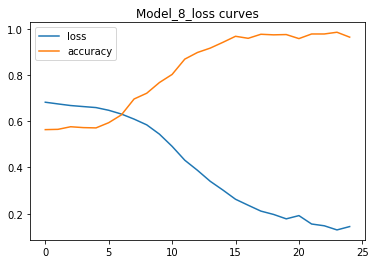

In [44]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8_loss curves")

## Note: For many problems , loss function is going down means model is improving 

## Finding the best learning rate
To find the ideal learning rate(the lr where the loss decreases the most during training) we're going to use following steps:
* A learning rate **callback** - you can think callback as an extra piece of functionality , you can add to your *while* its training.

* Another model
* A modified loss curve plot.

In [45]:
#random seed
tf.random.set_seed(42)

# Create a model (same as model 8)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#FIt the model(passing lr_scheduler callback)
history_9=model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

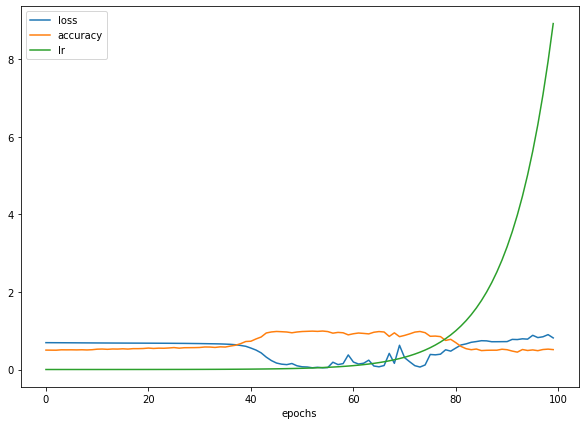

In [46]:
#Check the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

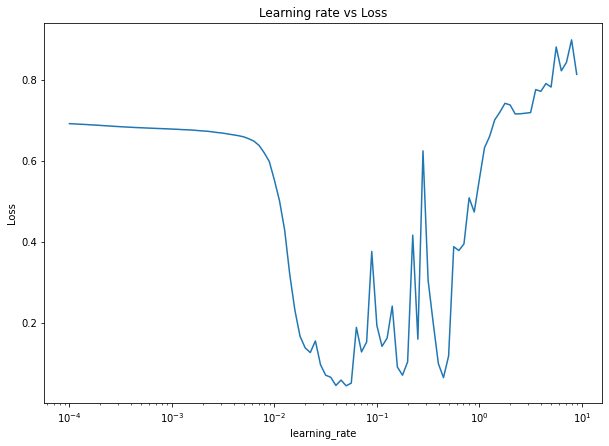

In [47]:
# Plot the learing rate vs loss
lrs= 1e-4 *(10 ** (tf.range(100)/20)) # 100 =epochs
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"]) # semilogx means we wants logx in the graph
plt.xlabel("learning_rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [48]:
# Example of other typical learning rate values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [49]:
(10**-1) - (10**-2)

0.09000000000000001

In [50]:
0.040
#Let's try using higher *ideal* learning rate with same model
#Random seed
tf.random.set_seed(42)
#Create model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)
history_10=model_10.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/25
25/25 [

In [51]:
# Evaluate 10 on test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750


[0.10717043280601501, 0.9750000238418579]

In [52]:
#Model 8
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863724172115326, 0.9449999928474426]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


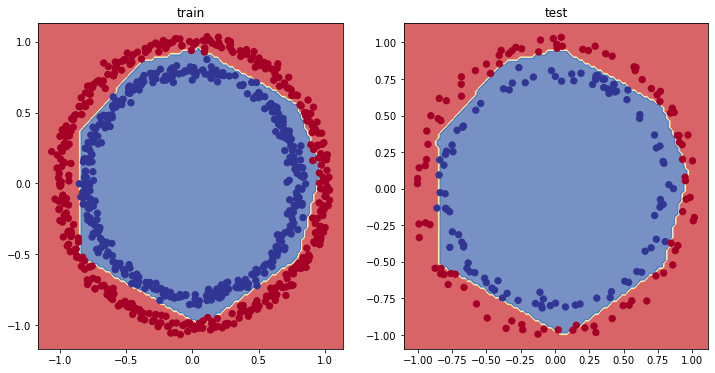

In [53]:
#Plot decision boundry for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()


## More classification evaluation methods
Alongside visualizong our models results as much as possible,
there are a handful of other classification evaluation methods & metrics you should familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (sckit-learn)

In [54]:
#Check accuracy of our model
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss on test set:{loss}")
print(f"Model accuracy on test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on test set:0.10717043280601501
Model accuracy on test set:97.50%


### Confusion matrix


In [55]:
from sklearn.metrics import confusion_matrix
# # Make prediction
y_preds=model_10.predict(X_test)
# # Create confusion matrix
# confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 3ms/step


In [56]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [57]:
y_preds[:10]

array([[0.99733496],
       [0.34712932],
       [0.9964213 ],
       [0.01256989],
       [0.7962179 ],
       [0.8826159 ],
       [0.03776478],
       [0.0349717 ],
       [0.9793736 ],
       [0.21966323]], dtype=float32)

Prediction array comes out in **prediction probablity form** from the standard output from the sigmoid activation function

In [58]:
# Convert prediction probablity into binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [59]:
# Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[96,  4],
       [ 1, 99]])

Pretyfing confusion matrix

In [60]:
import itertools

def plot_confusion_matrix(y_test,y_preds,classes=None,figsize=(10,10),text_size=15):
  
  #Create confusion matrix
  cm=confusion_matrix(y_test,tf.round(y_preds))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]#normalize confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it
  fig,ax=plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  
   #set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  #Label the axis
  ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )
  #set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust  label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  #Set threshold for different colors
  threshold=(cm.max()+cm.min())/2

#Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]> threshold else "black",
           size=text_size
           )

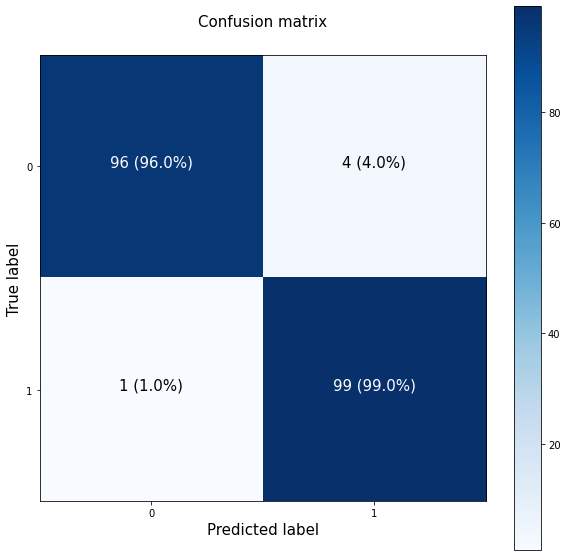

In [61]:
plot_confusion_matrix(y_test,y_preds)

## Working with larger example(multiclass classification)
When u have more than 2 classes as an option , it's known as **multi-class classification**
* This means if u have 3 different classes, it's multi-class classification


In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is sorted into  training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [63]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [64]:
# Check the shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

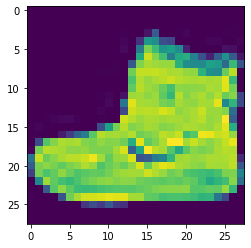

In [65]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [66]:
# Create a small list so we can index onto our training labels so they're human readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

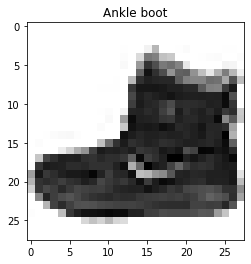

In [67]:
# Plot an example image and its image
index=0
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

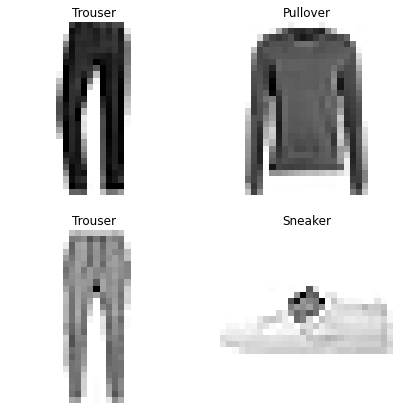

In [68]:
# Plot multiple random imgs
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
For multi-class classification model, we can use similar architecture to our binary classifier,but we gonna tweak some things:
* Input shape =28 x 28 ( shape of one image)
* Outputshape=10 (one per class)
* Loss function=Categorical_entropy
* If labels one_hot_encoded,use  Categorical_entropy
* if labels are integers use SparseCategorical entropy
* Output layer activation = softmax
* Input error ata h : 1. Flatten na kr rkha ho first layers me, 
* 2.loss function glt ho,
* 3.Output layer glt ho 
 

In [69]:
#Our data needs to be flattend 
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [70]:
train_data[0].shape

(28, 28)

In [71]:
len(class_names)

10

In [72]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Compile the model
model_11.compile( 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit the model
non_norm_history=model_11.fit(
    train_data,train_labels,epochs=10,validation_data=(test_data,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [73]:
# Check model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Check the min and max values of training data
train_data.min(),train_data.max(),test_data.max()

(0, 255, 255)

Neural network prefer data to be scaled(or normalized),this means they like to have numbers in tensors in between 0 and 1


In [75]:
#Normalizing the data
train_data_norm=train_data/train_data.max()
test_data_norm=test_data/test_data.max()
#Check min and max of norm data
train_data_norm.min(),train_data_norm.max(),test_data_norm.min(),test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [76]:

#Now data is normalized
#Set random seed
tf.random.set_seed(42)
#create model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_12.compile(  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#fit model
norm_history=model_12.fit(
    train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Note : Nerual  network tends to prefer data in numerical form as well as scaled/normalized(number btw 0 &1)

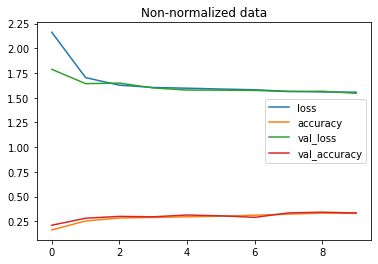

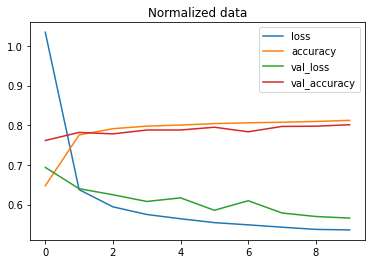

In [77]:
import pandas as pd
#Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Note : Same model with even *slightly * different data can produce dramatically different results. So when U're comparing model's, it's important to make sure you're comparing them on same criteria(same artitechture but different data or same data with different arti) 

## Find the ideal learning rate

In [ ]:
# random seed
tf.random.set_seed(42)
#Create model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
#Fit the model
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,epochs=40,
                             validation_data=(test_data_norm,test_labels)
                             ,callbacks=[lr_scheduler]
                             )

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding ideal learning rate')

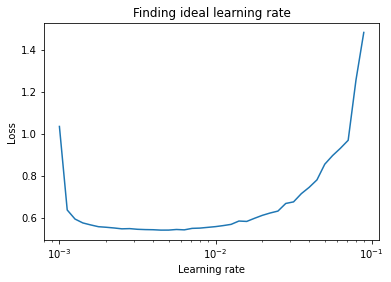

In [ ]:
# Plot learning rate decay curve
import matplotlib.pyplot as plt
epoch=40
lrs= 1e-3 *(10**(tf.range(epoch)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")


In [ ]:
10**-3 # adam default is lr?

0.001

In [ ]:
# refit model with ideal learning rate
#random seed
tf.random.set_seed(42)
#Create model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")  
])
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history_14=model_14.fit(train_data_norm,train_labels,epochs=20,
                        validation_data=(test_data_norm,test_labels)
                        )

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

from prompt_toolkit.application import application
## Evaluating multi class model
To evaluate multi-class classification model we could:
* Evaluate its performance using other classification metrics (eg. COnfusion metrics)
* Assess some of its predictions (through visualization)
* Improve its result (by training it for longer or changing the architecture)
* Save and export it for use in an application


Let's go through top 2

In [ ]:
## Creating confusion matrix
y_probs=model_14.predict(test_data_norm)
# plot_confusion_matrix(y_test=test_labels,y_preds=tf.round(y_preds))
y_probs

313/313 [==============================] - 1s 2ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, ..., 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, ..., 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, ..., 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       ...,
       [7.8579508e-02, 2.2294877e-05, 1.4033380e-01, ..., 2.9533631e-20,
        1.1197231e-01, 4.7599782e-09],
       [3.3110991e-05, 9.9301308e-01, 2.3392221e-07, ..., 9.3986513e-15,
        8.1592623e-07, 1.2158927e-11],
       [7.9816118e-08, 7.7578161e-10, 1.6470597e-04, ..., 4.3826256e-02,
        1.5162554e-03, 3.9120521e-02]], dtype=float32)

In [ ]:
model_14.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.8075


[0.5659515261650085, 0.8075000047683716]

In [ ]:
y_probs[0]

array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
       5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
       4.0605268e-03, 8.0787349e-01], dtype=float32)

In [ ]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:

test_labels[0]

9

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
#Convert all prediction probalities into integers
y_preds=y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

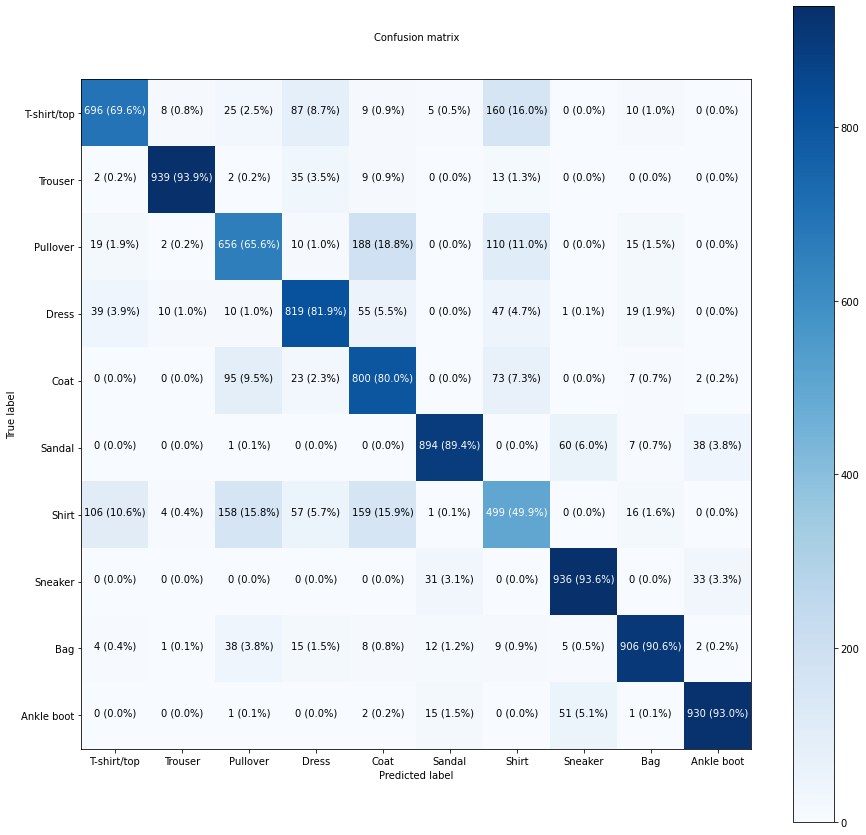

In [ ]:
# Make a prettier confusion matrix
plot_confusion_matrix(
    test_labels,y_preds,classes=class_names,
    figsize=(15,15),
    text_size=10
)

## **Note:** Often when working with imgs or other forms of visual data,its good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model. 
How about create a fun little function for:
* Plot a random img
* Make a prediction on said img
* Label the plot with truth labels and the predicted label

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random img,plots it and labels it with a prediction and truth label.
  """
  #set random int
  i=random.randint(0,len(images))
  #Create prediction and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #Change the color of the title if prediction is true or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{}{:2.0f}%   (True:{})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label
                                                    ),
             color=color
  )    

1/1 [==============================] - 0s 21ms/step


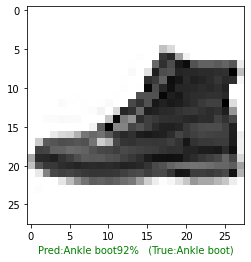

In [ ]:
#Check out random img as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names
                  )

### What patterns our model is learning

In [ ]:
# Find the layers of most recent model
model_14.layers

In [ ]:
# Extract a particual layer
model_14.layers[1]

In [ ]:
#Get the patterns of a layer in our network
weights,biases=model_14.layers[1].get_weights()
#shapes
weights,weights.shape

(array([[ 0.71502626, -0.06077098, -0.9976306 , -1.0484313 ],
        [ 0.2773213 , -0.47155428, -0.5291645 ,  0.0232926 ],
        [ 0.7752429 ,  0.5402763 , -1.128857  , -0.7426155 ],
        ...,
        [-0.3945344 ,  0.476287  , -0.22641571,  0.25505948],
        [-0.40515783,  0.618101  ,  0.23928401, -0.5038762 ],
        [ 0.23884569,  0.11606903, -0.12131351,  0.04352415]],
       dtype=float32), (784, 4))

In [ ]:
28*28

784

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check bias vector

In [ ]:
#Bias and bias shape
biases,biases.shape

(array([ 2.4485759e-02, -6.1474519e-04, -2.7230185e-01,  8.1124872e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.
The bias vector get initialized as zeros(in case of dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layers.

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


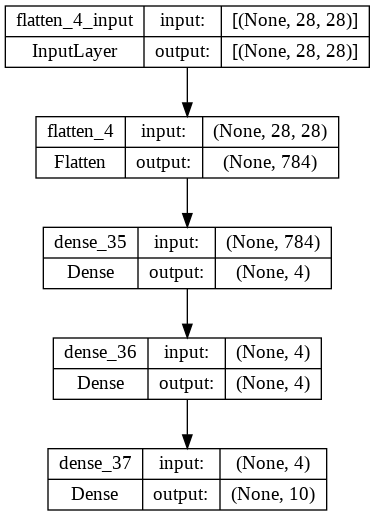

In [ ]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
#See the input nd output of each layer
plot_model(model_14,show_shapes=True)

#Excersise

##Ques 2: Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [ ]:
from sklearn.datasets import make_circles
#Make 10000 examples
n_samples=10000

# Create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
X.shape

(10000, 2)

In [ ]:
y.shape

(10000,)

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(8000, 2)

In [ ]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
X_test.shape

(2000, 2)

In [ ]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
import tensorflow as tf
#random state
tf.random.set_seed(42)
Ex_model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,1)),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
Ex_1_history_1=Ex_model_1.fit(X_train,y_train,epochs=15,
                              validation_data=(X_test,y_test),
                              callbacks=[lr_scheduler])

Epoch 1/15
250/250 [==============================] - 2s 4ms/step - loss: 0.6915 - accuracy: 0.5124 - val_loss: 0.6887 - val_accuracy: 0.5280 - lr: 0.0010
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.5489 - val_loss: 0.6717 - val_accuracy: 0.5585 - lr: 0.0011
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 0.6165 - accuracy: 0.6711 - val_loss: 0.4575 - val_accuracy: 0.8605 - lr: 0.0013
Epoch 4/15
250/250 [==============================] - 1s 3ms/step - loss: 0.2146 - accuracy: 0.9826 - val_loss: 0.0811 - val_accuracy: 0.9980 - lr: 0.0014
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9984 - val_loss: 0.0251 - val_accuracy: 0.9985 - lr: 0.0016
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9975 - val_loss: 0.0105 - val_accuracy: 0.9990 - lr: 0.0018
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - lo

In [ ]:
Ex_model_1.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9985


[0.0033903997391462326, 0.9984999895095825]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


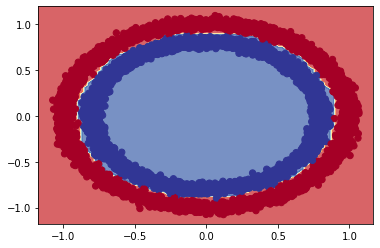

In [ ]:
plot_decision_boundary(Ex_model_1,X_train,y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


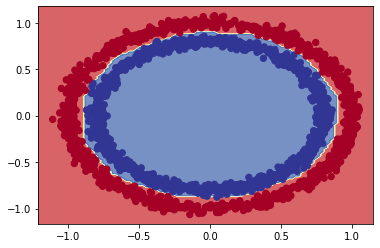

In [ ]:
plot_decision_boundary(Ex_model_1,X_test,y_test)

63/63 [==============================] - 0s 2ms/step


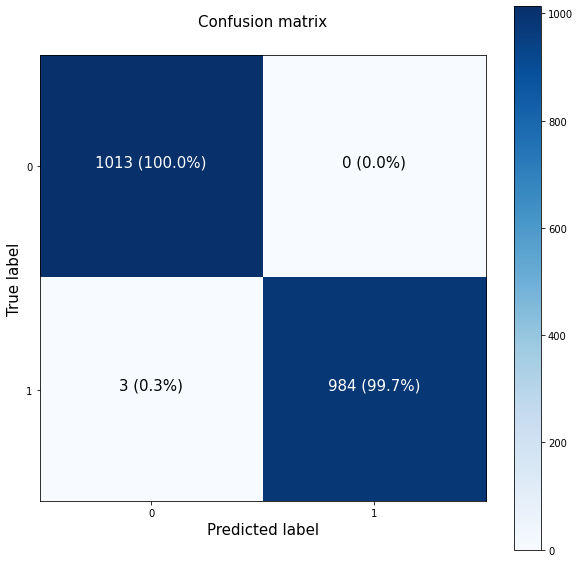

In [ ]:
y_preds=Ex_model_1.predict(X_test)
plot_confusion_matrix(y_test,y_preds)

## Q3: Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons
#Make 10000 examples
n_samples=10000

# Create circles
X,y=make_moons(n_samples,noise=0.03,random_state=42)

In [ ]:
X

array([[ 0.3423736 , -0.18332506],
       [-0.89759408,  0.15006114],
       [ 0.44922107,  0.8573337 ],
       ...,
       [ 0.00951042,  0.25376962],
       [ 0.86117045,  0.51716097],
       [ 0.94867901, -0.45668393]])

In [ ]:

y

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
X[0].shape

(2,)

In [ ]:
y[0].shape

()

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

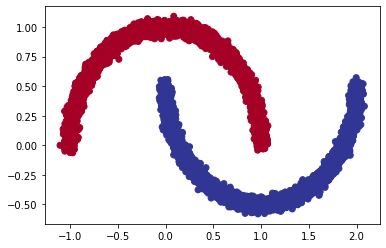

In [ ]:
 #  Visualize with plot
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X_train.shape

(8000, 2)

In [ ]:
y_train.shape

(8000,)

In [ ]:

import tensorflow as tf


In [ ]:
#random seed
tf.random.set_seed(42)
#Create model
Ex_model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,1)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
history_Q_3=Ex_model3.fit(X_train,y_train,epochs=100,
                          validation_data=(X_test,y_test),
                          callbacks=[lr_scheduler]
                          )

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.7250 - val_loss: 0.3778 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8556 - val_loss: 0.2629 - val_accuracy: 0.8855 - lr: 0.0011
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2643 - accuracy: 0.8759 - val_loss: 0.2196 - val_accuracy: 0.9050 - lr: 0.0013
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.8929 - val_loss: 0.1933 - val_accuracy: 0.9150 - lr: 0.0014
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.9019 - val_loss: 0.1732 - val_accuracy: 0.9225 - lr: 0.0016
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.9104 - val_loss: 0.1528 - val_accuracy: 0.9325 - lr: 0.0018
Epoch 7/100
250/250 [==============================] - 1s 3ms/st

In [ ]:
Ex_model3.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 3.9383e-09 - accuracy: 1.0000


[3.938333215103285e-09, 1.0]

In [ ]:
tf.random.set_seed(42)
#Create model
Ex_model_3_1=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_3_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


In [ ]:
history_Q_4=Ex_model_3_1.fit(X_train,y_train,epochs=100,
                          validation_data=(X_test,y_test),
                          callbacks=[lr_scheduler]
                          )

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.7250 - val_loss: 0.3778 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8556 - val_loss: 0.2629 - val_accuracy: 0.8855 - lr: 0.0011
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2643 - accuracy: 0.8759 - val_loss: 0.2196 - val_accuracy: 0.9050 - lr: 0.0013
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2300 - accuracy: 0.8929 - val_loss: 0.1933 - val_accuracy: 0.9150 - lr: 0.0014
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.9019 - val_loss: 0.1732 - val_accuracy: 0.9225 - lr: 0.0016
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.9104 - val_loss: 0.1528 - val_accuracy: 0.9325 - lr: 0.0018
Epoch 7/100
250/250 [==============================] - 1s 2ms/st

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


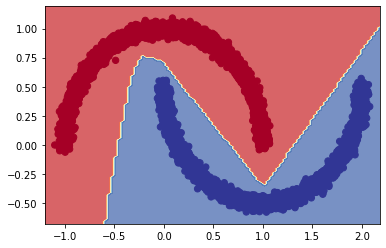

In [ ]:
plot_decision_boundary(Ex_model3,X_train,y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


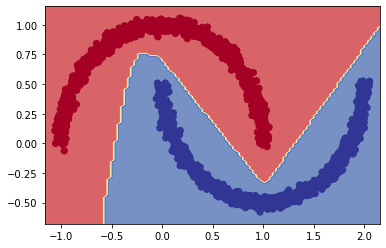

In [ ]:
plot_decision_boundary(Ex_model3,X_test,y_test)

In [ ]:
y_preds=Ex_model3.predict(X_test)

63/63 [==============================] - 0s 1ms/step


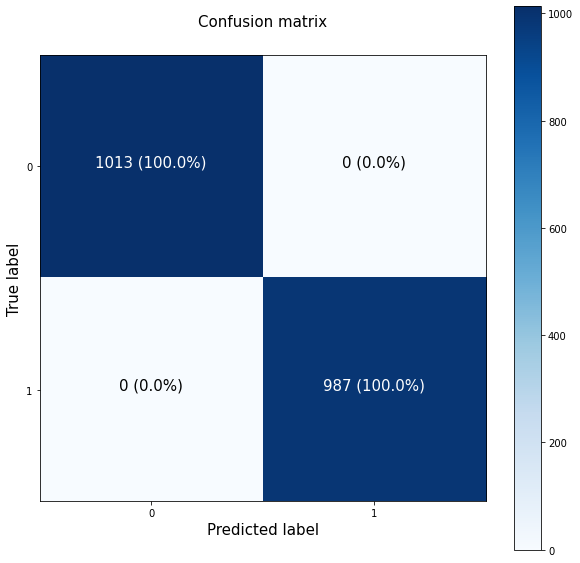

In [ ]:
plot_confusion_matrix(y_test,y_preds)

##Q5: Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
pd.DataFrame(y_train).value_counts() # Means there are 10  classes

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [ ]:
#Normalizing our data
X_train.max()

255

In [ ]:
X_test.max()

255

In [ ]:
X_train_norm=X_train/X_train.max()
X_test_norm=X_test/X_test.max()
X_train_norm.shape,len(y_train)

((60000, 28, 28), 60000)

In [ ]:
#random seed
tf.random.set_seed(42)
#model creation
Ex_model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history_Ex_model_4=Ex_model_4.fit(X_train_norm,y_train,epochs=20,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2284 - accuracy: 0.5863 - val_loss: 0.9073 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7851 - accuracy: 0.7547 - val_loss: 0.6999 - val_accuracy: 0.7715 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6435 - accuracy: 0.7822 - val_loss: 0.6493 - val_accuracy: 0.7795 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6116 - accuracy: 0.7903 - val_loss: 0.6408 - val_accuracy: 0.7805 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5989 - accuracy: 0.7922 - val_loss: 0.6189 - val_accuracy: 0.7865 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5913 - accuracy: 0.7932 - val_loss: 0.6730 - val_accuracy: 0.7675 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5s

In [ ]:
Ex_model_4.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.7959


[0.5946959257125854, 0.7958999872207642]

In [ ]:
y_probs=Ex_model_4.predict(X_test_norm)
y_preds=y_probs.argmax(axis=1)#Converting this prob matrix to discrete form
y_preds

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

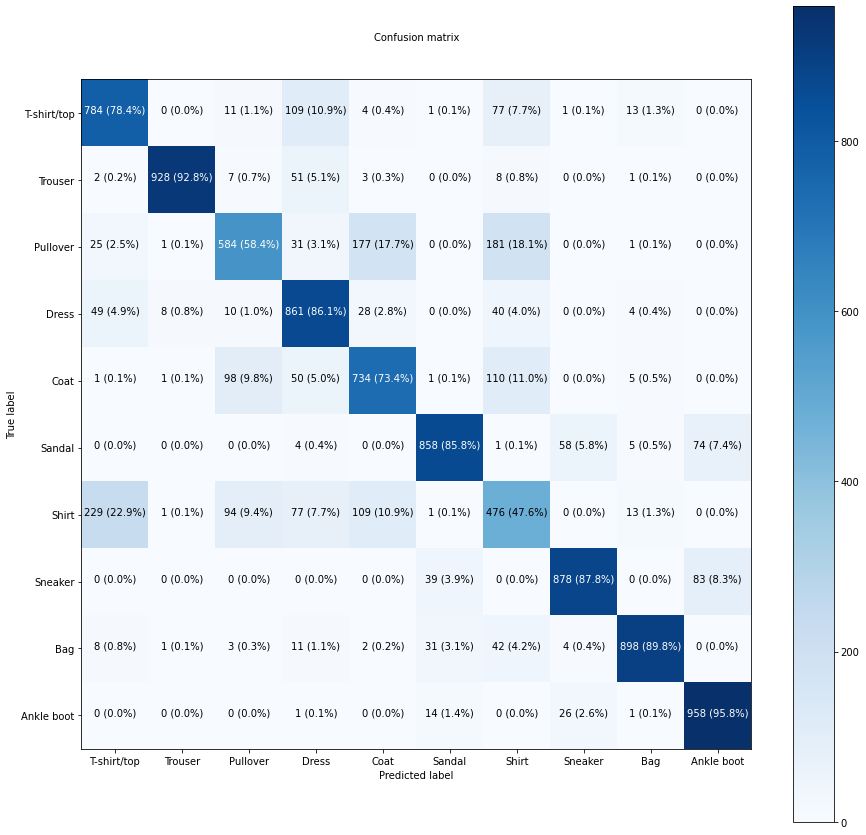

In [ ]:
plot_confusion_matrix(y_test,y_preds,classes=class_names,
    figsize=(15,15),
    text_size=10)

Text(0.5, 1.0, 'Learning rate vs Loss')

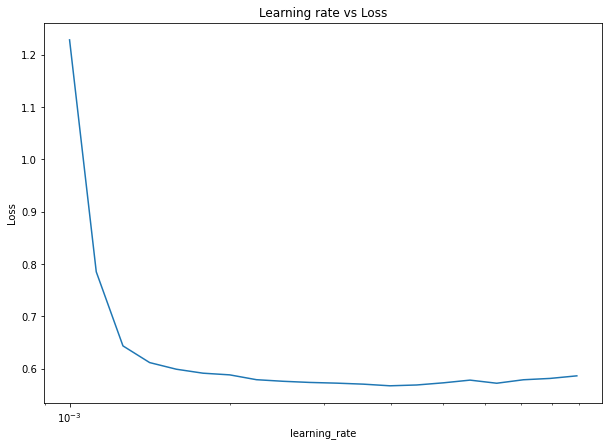

In [ ]:
# Plot the learing rate vs loss
lrs= 1e-3 *(10 ** (tf.range(20)/20)) # 100 =epochs
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_Ex_model_4.history["loss"]) # semilogx means we wants logx in the graph
plt.xlabel("learning_rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
#random seed
tf.random.set_seed(42)
#model creation
Ex_model_4_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history_Ex_model_4_2=Ex_model_4_2.fit(X_train_norm,y_train,epochs=17,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4916 - accuracy: 0.8249 - val_loss: 0.4119 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 2/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3703 - accuracy: 0.8647 - val_loss: 0.4415 - val_accuracy: 0.8436 - lr: 0.0011
Epoch 3/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3418 - accuracy: 0.8735 - val_loss: 0.3861 - val_accuracy: 0.8594 - lr: 0.0013
Epoch 4/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3211 - accuracy: 0.8816 - val_loss: 0.4020 - val_accuracy: 0.8616 - lr: 0.0014
Epoch 5/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3087 - accuracy: 0.8863 - val_loss: 0.3575 - val_accuracy: 0.8723 - lr: 0.0016
Epoch 6/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.8875 - val_loss: 0.3721 - val_accuracy: 0.8651 - lr: 0.0018
Epoch 7/17
1875/1875 [==============================] - 7s

In [ ]:
Ex_model_4_2.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8571


[0.4301125109195709, 0.8571000099182129]

In [ ]:
tf.random.set_seed(42)
#model creation
Ex_model_4_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history_Ex_model_4_3=Ex_model_4_3.fit(X_train_norm,y_train,epochs=17,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4989 - accuracy: 0.8212 - val_loss: 0.4206 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 2/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3764 - accuracy: 0.8621 - val_loss: 0.4352 - val_accuracy: 0.8481 - lr: 0.0011
Epoch 3/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3456 - accuracy: 0.8734 - val_loss: 0.4076 - val_accuracy: 0.8524 - lr: 0.0013
Epoch 4/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3273 - accuracy: 0.8789 - val_loss: 0.3830 - val_accuracy: 0.8637 - lr: 0.0014
Epoch 5/17
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3143 - accuracy: 0.8825 - val_loss: 0.3782 - val_accuracy: 0.8637 - lr: 0.0016
Epoch 6/17
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3070 - accuracy: 0.8863 - val_loss: 0.3829 - val_accuracy: 0.8596 - lr: 0.0018
Epoch 7/17
1875/1875 [==============================] - 7s

In [ ]:
Ex_model_4_3.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8541


[0.43600672483444214, 0.8540999889373779]

In [ ]:
tf.random.set_seed(42)
#model creation
Ex_model_4_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["accuracy"]
)
history_Ex_model_4_4=Ex_model_4_4.fit(X_train_norm,y_train,epochs=17,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/17
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5556 - accuracy: 0.8008 - val_loss: 0.4585 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 2/17
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8483 - val_loss: 0.4838 - val_accuracy: 0.8340 - lr: 0.0011
Epoch 3/17
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8566 - val_loss: 0.4240 - val_accuracy: 0.8424 - lr: 0.0013
Epoch 4/17
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8628 - val_loss: 0.4170 - val_accuracy: 0.8459 - lr: 0.0014
Epoch 5/17
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8661 - val_loss: 0.4137 - val_accuracy: 0.8473 - lr: 0.0016
Epoch 6/17
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3579 - accuracy: 0.8660 - val_loss: 0.4528 - val_accuracy: 0.8320 - lr: 0.0018
Epoch 7/17
1875/1875 [==============================] - 6s

In [ ]:
Ex_model_4_4.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.8423


[0.46153777837753296, 0.8422999978065491]

In [ ]:
#random seed
tf.random.set_seed(42)
#model creation
Ex_model_4_5=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["accuracy"]
)
history_Ex_model_4_2=Ex_model_4_5.fit(X_train_norm,y_train,epochs=10,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4916 - accuracy: 0.8249 - val_loss: 0.4119 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3703 - accuracy: 0.8647 - val_loss: 0.4415 - val_accuracy: 0.8436 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3418 - accuracy: 0.8735 - val_loss: 0.3861 - val_accuracy: 0.8594 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3211 - accuracy: 0.8816 - val_loss: 0.4020 - val_accuracy: 0.8616 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.8863 - val_loss: 0.3575 - val_accuracy: 0.8723 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.8875 - val_loss: 0.3721 - val_accuracy: 0.8651 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 7s

In [ ]:
Ex_model_4_5.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8646


[0.372562974691391, 0.8646000027656555]

In [ ]:
#random seed
tf.random.set_seed(42)
#model creation
Ex_model_4_6=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_6.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history_Ex_model_4_6=Ex_model_4_6.fit(X_train_norm,y_train,epochs=8,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4955 - accuracy: 0.8254 - val_loss: 0.4202 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8633 - val_loss: 0.4443 - val_accuracy: 0.8469 - lr: 0.0011
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3425 - accuracy: 0.8749 - val_loss: 0.3886 - val_accuracy: 0.8585 - lr: 0.0013
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3217 - accuracy: 0.8834 - val_loss: 0.3880 - val_accuracy: 0.8622 - lr: 0.0014
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3102 - accuracy: 0.8848 - val_loss: 0.3858 - val_accuracy: 0.8621 - lr: 0.0016
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2977 - accuracy: 0.8889 - val_loss: 0.4038 - val_accuracy: 0.8488 - lr: 0.0018
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/st

In [ ]:
 Ex_model_4_6.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8743


[0.3520105481147766, 0.8743000030517578]

In [ ]:
y_probs=Ex_model_4_6.predict(X_test_norm)
y_preds=y_probs.argmax(axis=1)#Converting this prob matrix to discrete form
y_preds

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

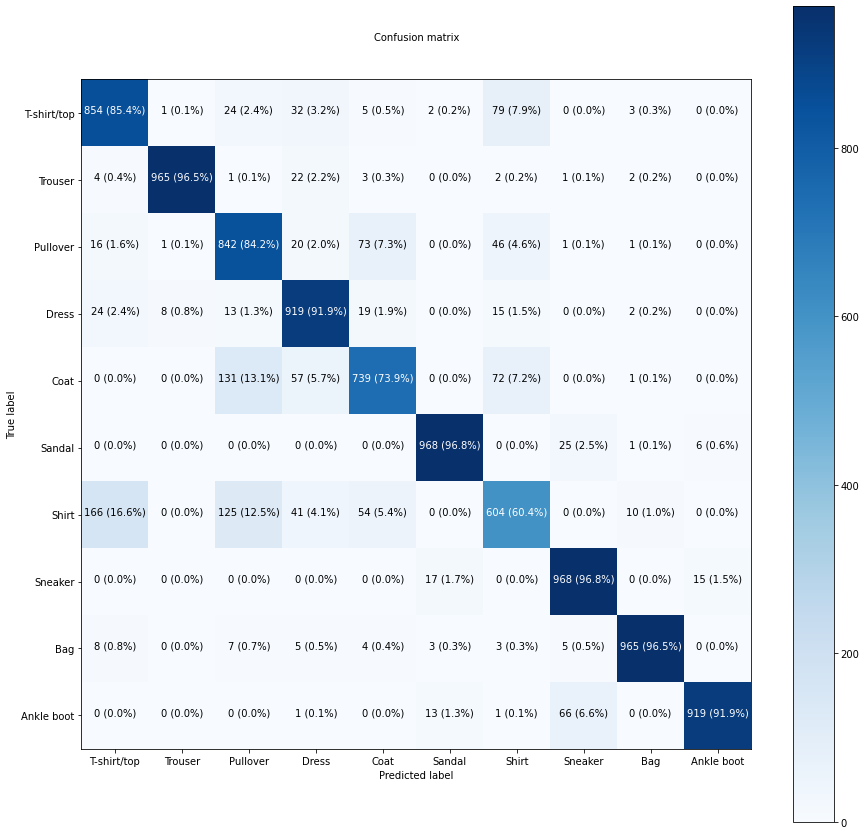

In [ ]:
plot_confusion_matrix(y_test,y_preds,classes=class_names,
    figsize=(15,15),
    text_size=10)

In [ ]:
#random seed
tf.random.set_seed(42)
#model creation
Ex_model_4_7=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax",name="Output_layer") #As this is multi-class problem so,softmax
])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
Ex_model_4_7.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Categorical me label one-hot encode hona chaiye
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history_Ex_model_4_7=Ex_model_4_7.fit(X_train_norm,y_train,epochs=10,validation_data=(X_test_norm,y_test),
                                  callbacks=[lr_scheduler]
                                  )

In [ ]:
y_probs=Ex_model_4_7.predict(X_test_norm)
y_preds=y_probs.argmax(axis=1)#Converting this prob matrix to discrete form
y_preds

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

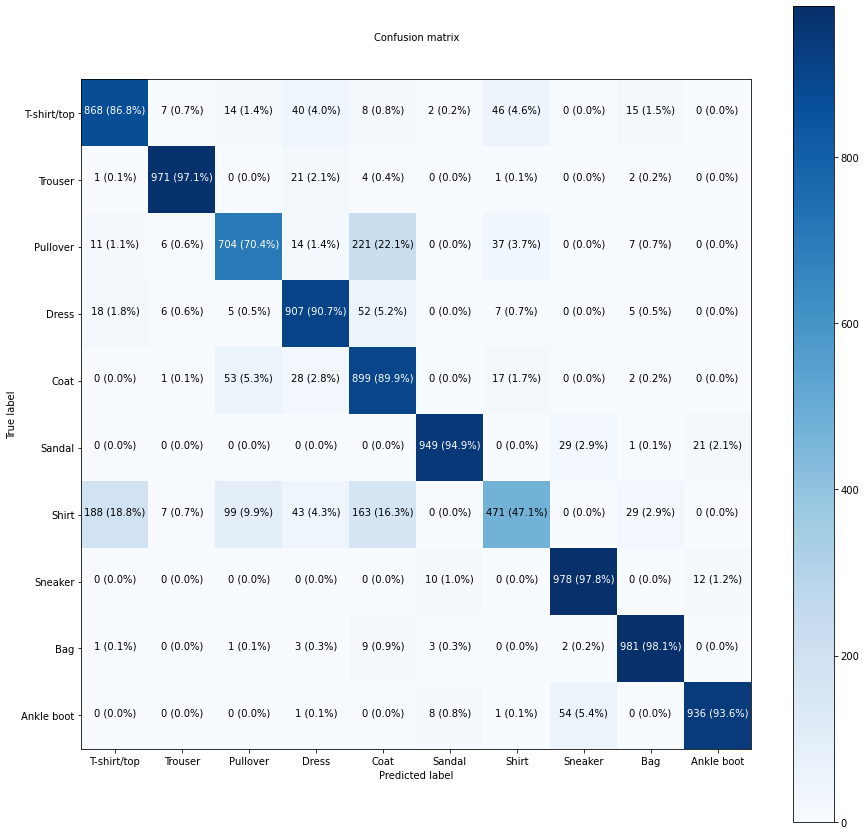

In [ ]:
plot_confusion_matrix(y_test,y_preds,classes=class_names,
    figsize=(15,15),
    text_size=10)

In [ ]:
Ex_model_4_7.evaluate(X_test_norm,y_test)##best  model so far